In [4]:
from functions import *
# File names for TECQ PM2.5 stations in West Texas
file_name_cams49=r'CAMS_49_SocorroHueco.xlsx'
file_name_cams1028=r'CAMS_1028_Lubbock.xlsx'

In [5]:
# Read both TECQ files into dataframes
tecq_cams49 = read_xlsx_tecq(file_name_cams49)
tecq_cams1028= read_xlsx_tecq(file_name_cams1028)
#tecq_cams49.info()
tecq_cams49
tecq_cams1028

,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,...,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,4.0,5.0,2.0,3.0,4.0,3.0,3.0,7.0,2.0,3.0,...,0.0,6.0,4.0,3.0,3.0,3.0,1.0,2.0,2.0,4.0
2019-01-02,-1.0,3.0,2.0,2.0,4.0,2.0,4.0,6.0,1.0,7.0,...,3.0,8.0,4.0,8.0,12.0,10.0,8.0,7.0,7.0,10.0
2019-01-03,10.0,16.0,12.0,9.0,7.0,6.0,6.0,6.0,2.0,6.0,...,0.0,3.0,2.0,4.0,3.0,5.0,4.0,1.0,2.0,2.0
2019-01-04,-2.0,2.0,0.0,-3.0,-1.0,-3.0,1.0,0.0,-4.0,2.0,...,3.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,6.0,3.0,7.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,1.3,1.3,4.9,8.0,5.5,8.0,3.7,6.0,8.1,9.2,...,3.3,1.4,1.3,1.3,1.3,9.5,3.8,9.7,5.7,8.9
2019-12-28,9.3,10.2,2.9,6.8,4.5,6.1,6.3,-0.1,0.2,-0.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


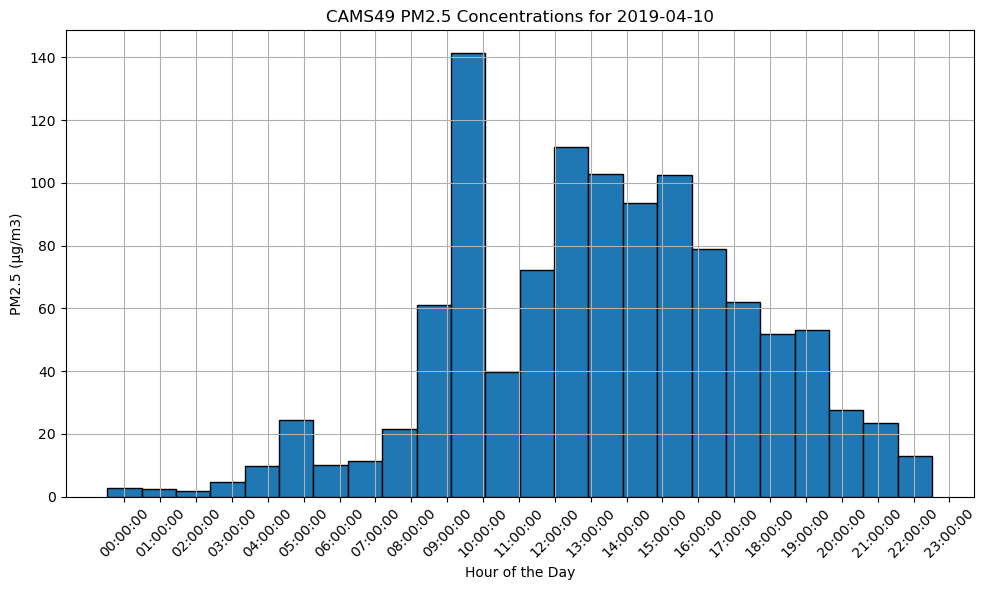

In [6]:

timestamps = pd.date_range('2019-04-10', periods=24, freq='H')

plt.figure(figsize=(10, 6))
plt.hist(timestamps.hour, bins=24, weights=tecq_cams49.loc['2019-04-10'].values, edgecolor='black', align='left')
plt.xlabel('Hour of the Day')
plt.ylabel('PM2.5 (µg/m3)')
plt.title('CAMS49 PM2.5 Concentrations for 2019-04-10')
plt.xticks(range(24), [f'{hour:02d}:00:00' for hour in range(24)], rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()

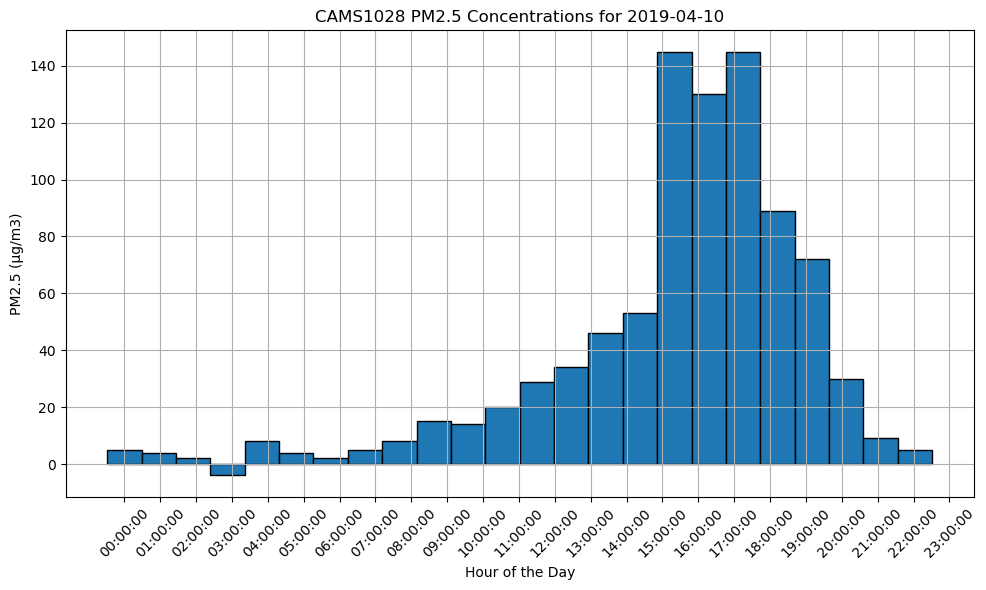

In [7]:

timestamps = pd.date_range('2019-04-10', periods=24, freq='H')

plt.figure(figsize=(10, 6))
plt.hist(timestamps.hour, bins=24, weights=tecq_cams1028.loc['2019-04-10'].values, edgecolor='black', align='left')
plt.xlabel('Hour of the Day')
plt.ylabel('PM2.5 (µg/m3)')
plt.title('CAMS1028 PM2.5 Concentrations for 2019-04-10')
plt.xticks(range(24), [f'{hour:02d}:00:00' for hour in range(24)], rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()